## Shopify Data Science Challenge Problems:

#### Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

1. Think about what could be going wrong with our calculation. 
2. Think about a better way to evaluate this data. 
3. What metric would you report for this dataset?
4. What is its value?


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [82]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [83]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Text(0.5, 1.0, 'boxplot of the order amount')

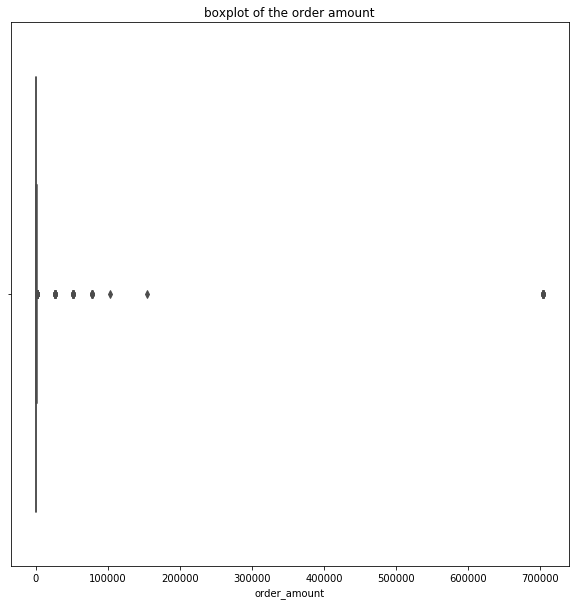

In [84]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(df['order_amount'], color='red')
plt.title('boxplot of the order amount')

Text(0.5, 1.0, 'boxplot of the total items ordered per transaction')

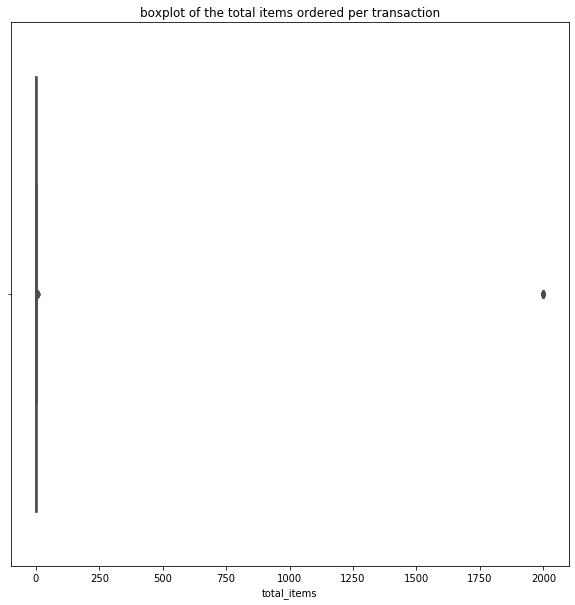

In [88]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(df['total_items'], color='blue')
plt.title('boxplot of the total items ordered per transaction')


Text(0.5, 1.0, 'boxplot of the order amount')

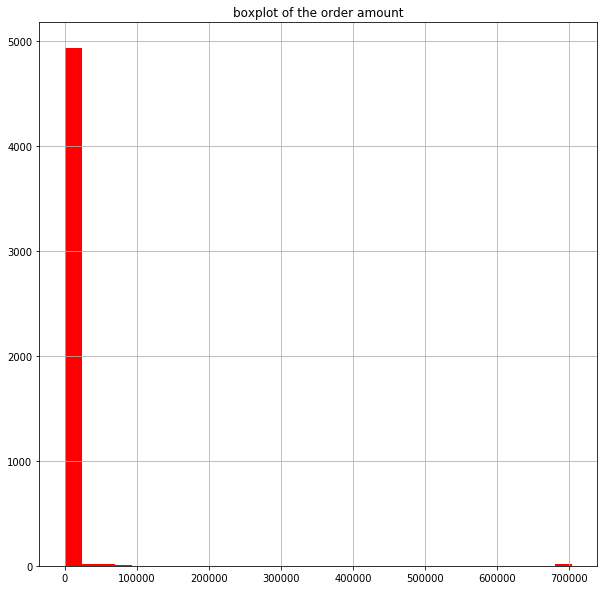

In [85]:
fig = plt.figure(figsize=(10,10))
df['order_amount'].hist(bins=30,color='red')
plt.title('boxplot of the order amount')

The box plot and histogram of order amount shows that there are several orders well above the mean order value of $3145, indicating that the mean has been greatly skewed by these large outlier values.

I will remove these outliers by computing the z score for each value in order_amount, then remove all those with values above 3. A z score above 3 means the data point is 3 standard deviations above the mean, which is considered unusual and should be removed.

In [90]:
# use z score to remove outliers
df_cleaned=df[(np.abs(stats.zscore(df.order_amount)<3))]
df_cleaned.mean()

order_id        2501.423525
shop_id           50.100763
user_id          849.912686
order_amount     723.261742
total_items        1.993175
dtype: float64

In [87]:
#mean order amount on the cleaned dataset.
df_cleaned['order_amount'].median()

284.0

The median order_amount of $284 would be a better metric to use because it is not as sensitive to outliers as the mean would be.